In [1]:
import torch
from torch import tensor
from torch.autograd import grad
import numpy as np

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import log10, floor, ceil, frexp

In [2]:
all_values = []
all_errors = []
values_dict = {}

def mnk(x, y):
    b = (np.mean(x*y) - np.mean(x)*np.mean(y))/(np.mean(x**2) - np.mean(x)**2)
    a = np.mean(y) - b*np.mean(x)
    sb = 1/np.sqrt(len(x)) * np.sqrt((np.mean(y**2) - np.mean(y)**2)/(np.mean(x**2) - np.mean(x)**2) - b**2)
    sa = sb*np.sqrt(np.mean(x**2) - np.mean(x)**2)
    
    return a, b, sa, sb

def value(x, err):
    values_dict[x] = err
    
    x = tensor(x, requires_grad=True, dtype=torch.float64)
    all_values.append(x)
    all_errors.append(err)
    return x

def get_error(x):
    grads = grad(x, all_values, retain_graph=True, allow_unused=True)
    res = 0
    for i, error in enumerate(all_errors):
        if grads[i] is not None:
            res += (grads[i]*error)**2
    return res**0.5

def get_man_exp(x):
    e = floor(log10(x))
    m = x * 10**(-e)
    return m, e

def round2one(err):
    m, e = get_man_exp(err)
    m = round(m, 1)
    if int(m) in [1, 2]:
        return int(m*10), e - 1
    else:
        return int(m + 1), e
    
def science_notation(x, err):
    err, er = round2one(err)
    x = round(x, -er)
    m, e = get_man_exp(x)
    
    if abs(e) <= 1:
        print(f'${x} \\pm {err * 10 ** (er)}$')
    else:
        print(f'$({m} \\pm {err * 10 ** (-e+er)}) \\cdot 10^{"{" + str(e) + "}"}$')

def show(x, dx):
    x = float(x.detach())
    dx = float(dx)
    return science_notation(x, dx)

def mnk_a0(x, y):
    b = np.mean(x*y)/np.mean(x**2)
    sb = 1/np.sqrt(len(x)) * np.sqrt((np.mean(y**2)/np.mean(x**2)) - b**2)
    
    return b, sb

In [3]:
dfs = [pd.read_csv(f'data/F{_}.txt') for _ in range(1, 6)]
df2 = pd.read_csv(f'data/ms.txt')
g = 9.8
l = 0.5

In [28]:
' & '.join([str(_) for _ in list(dfs[4].nu.values)])

'221.8 & 444.1 & 666.7 & 888.89 & 1111.9 & 1335.0'

In [4]:
df2['F'] = df2.m/1000*g

In [5]:
df2['F']

0     8.93270
1    13.77978
2    18.60040
3    23.41710
4    28.19362
Name: F, dtype: float64

,m,F
0,911.5,8.93270
1,1406.1,13.77978
2,1898.0,18.60040
3,2389.5,23.41710
4,2876.9,28.19362


$(1.3184 \pm 0.0018000000000000002) \cdot 10^{2}$
None
$(1.5930000000000002 \pm 0.002) \cdot 10^{2}$
None
$(1.8131000000000002 \pm 0.0008) \cdot 10^{2}$
None
$(2.0254 \pm 0.0013000000000000002) \cdot 10^{2}$
None
$(2.2236000000000002 \pm 0.0006000000000000001) \cdot 10^{2}$
None


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


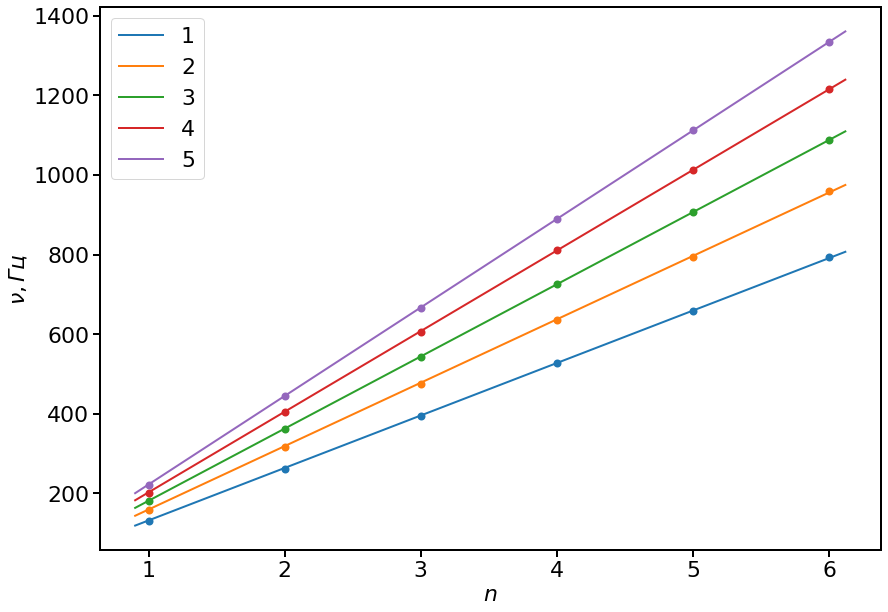

In [6]:
plt.rc('font', size=22)
bs = []
sbs = []
fig, ax = plt.subplots(figsize=(14, 10))
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

ax.xaxis.set_tick_params(width=2, length=7)
ax.yaxis.set_tick_params(width=2, length=7)

ax.set_xlabel(r"$n$")
ax.set_ylabel(r"$\nu, Гц$")

for i, df in enumerate(dfs):
    ax.scatter(df.n, df.nu, linewidth=2)
    b, sb = mnk_a0(df.n, df.nu)

    X = np.array([min(df.n)*0.9, max(df.n)*1.02])
    Y = b*X
    ax.plot(X, Y, linewidth=2, label=str(i+1))

    sb = np.sqrt(0.01**2 + sb**2)
    bs.append(b)
    sbs.append(sb)
    print(science_notation(b, sb))

ax.legend()
fig.savefig(r'D:\LabProjects\1.4.5\report\images\{}.eps'.format('gr0'), format='eps')

In [7]:
bs = np.array(bs)
sbs = np.array(sbs)

In [8]:
bs, sbs

(array([131.83736264, 159.2978022 , 181.30967033, 202.53813187,
        222.3643956 ]),
 array([0.17760447, 0.2037225 , 0.07019713, 0.13137469, 0.05919703]))

In [9]:
sbs = bs * np.sqrt((sbs/bs)**2 + (0.1/100/l)**2)
bs *= 2*l

In [10]:
bs, sbs

(array([131.83736264, 159.2978022 , 181.30967033, 202.53813187,
        222.3643956 ]),
 array([0.31791148, 0.37816136, 0.36935136, 0.42584749, 0.4486513 ]))

In [32]:
bs**2

array([17381.09018718, 25375.78978505, 32873.19655505, 41021.69486063,
       49445.92443251])

$(1.772 \pm 0.02) \cdot 10^{3}$
None


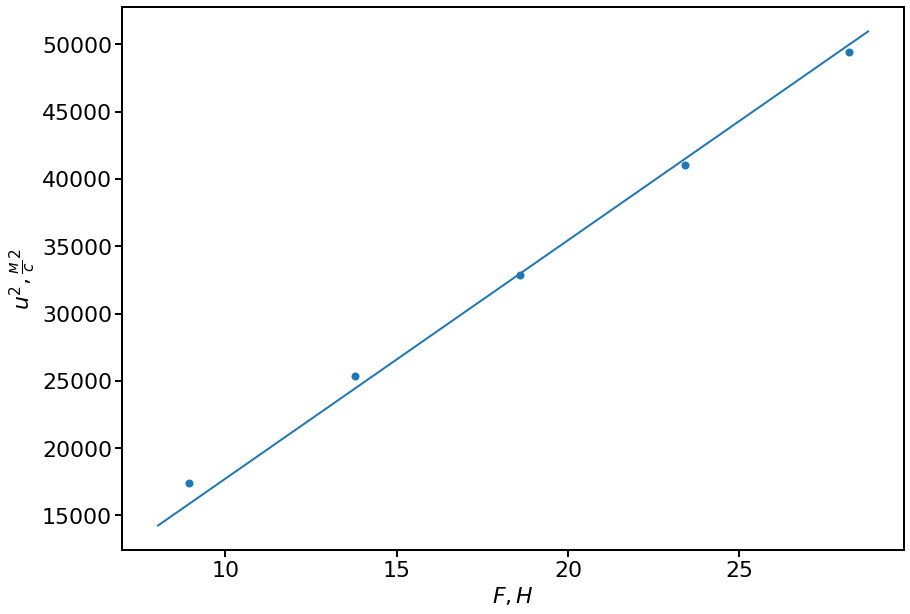

In [11]:
plt.rc('font', size=22)

fig, ax = plt.subplots(figsize=(14, 10))
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

ax.xaxis.set_tick_params(width=2, length=7)
ax.yaxis.set_tick_params(width=2, length=7)

ax.scatter(df2.F, bs**2, linewidth=2)
b, sb = mnk_a0(df2.F, bs**2)

X = np.array([min(df2.F)*0.9, max(df2.F)*1.02])
Y = b*X
ax.plot(X, Y, linewidth=2)

ax.set_xlabel(r"$F, Н$")
ax.set_ylabel(r"$u^2, \frac{м}{с}^2$")

fig.savefig(r'D:\LabProjects\1.4.5\report\images\gr.eps', format='eps')

sb = np.sqrt(max(sbs)**2 + sb**2)
print(science_notation(b, sb))

In [15]:
b

1771.9495260494664

In [14]:
1/b*1000

0.5643501608251135

In [13]:
pl = 1/b
spl = sb/b**2
science_notation(pl, spl)

$(5.640000000000001 \pm 0.07) \cdot 10^{-4}$
